In [1]:
import pandas as pd
from google.colab import files 
uploaded = files.upload()

df = pd.read_csv('Amtrak.csv')
df.describe(include='all')

Saving Amtrak.csv to Amtrak (1).csv


,Month,Ridership
count,159,159.000000
unique,159,NaN
top,1/1/1991,NaN
freq,1,NaN
mean,NaN,1822.197208
std,NaN,181.636034
min,NaN,1360.852000
25%,NaN,1698.564500
50%,NaN,1831.049000
75%,NaN,1966.957500


In [2]:
df['Date']=pd.to_datetime(df.Month, format='%d/%m/%Y')

# generate time series data in python 
rider_ts = pd.Series(df.Ridership.values, 
                     index=df.Date,
                     name='Ridership')
rider_ts

Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
                ...   
2003-11-01    2076.054
2003-12-01    2140.677
2004-01-01    1831.508
2004-02-01    1838.006
2004-03-01    2132.446
Name: Ridership, Length: 159, dtype: float64

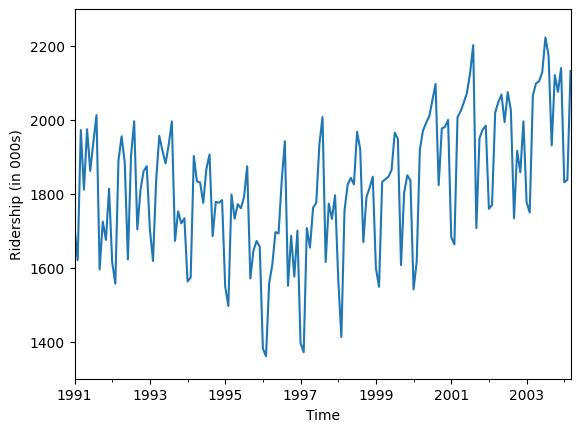

In [3]:
# show visualization 

import matplotlib.pylab as plt
ax=rider_ts.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Ridership (in 000s)')
ax.set_ylim(1300,2300)
plt.show()

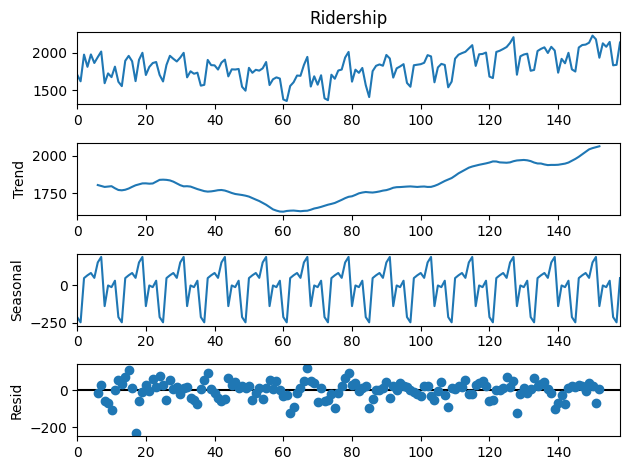

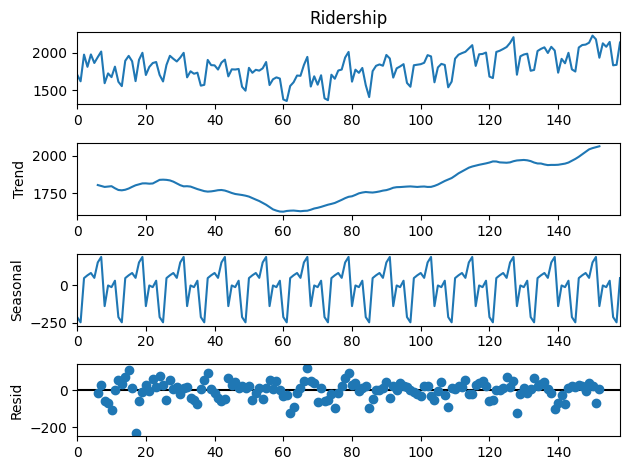

In [4]:
# time series seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(df['Ridership'], model='additive', period=12)
result.plot()

In [5]:
# separate into training and validation 
nValid = 36 
nTrain = len(rider_ts)-nValid

train_ts =rider_ts[:nTrain] 
valid_ts =  rider_ts[nTrain:]

train_ts


Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
                ...   
2000-11-01    1981.408
2000-12-01    2000.153
2001-01-01    1683.148
2001-02-01    1663.404
2001-03-01    2007.928
Name: Ridership, Length: 123, dtype: float64

In [6]:
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools 

ts_df = tsatools.add_trend(rider_ts, trend='t') 
ts_df['Month'] = ts_df.index.month

ts_df

,Ridership,trend,Month
Date,,,
1991-01-01,1708.917,1.0,1
1991-02-01,1620.586,2.0,2
1991-03-01,1972.715,3.0,3
1991-04-01,1811.665,4.0,4
1991-05-01,1974.964,5.0,5
...,...,...,...
2003-11-01,2076.054,155.0,11
2003-12-01,2140.677,156.0,12
2004-01-01,1831.508,157.0,1


In [7]:
train_df = ts_df[:nTrain]
valid_df = ts_df[nTrain:]

rider_lm = sm.ols(formula='Ridership~trend',data=train_df).fit()

rider_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7456
Date:                Tue, 18 Apr 2023   Prob (F-statistic):              0.390
Time:                        22:09:34   Log-Likelihood:                -797.95
No. Observations:                 123   AIC:                             1600.
Df Residuals:                     121   BIC:                             1606.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1750.3595     29.073     60.206      0.000    1692.802    1807.917
trend          0.3514      0.407      0.864      0.390      -0.454       1.157
==============================================================================
Omnibus:                        4.293   Durbin-Watson:                   1.110
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                4.340
Skew:                          -0.435   Prob(JB):                        0.114
Kurtosis:                       2.700   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
! pip install dmba
from dmba import regressionSummary

predict_lm = rider_lm.predict(valid_df)
regressionSummary(valid_ts,predict_lm)

# quadratic trend 
import numpy as np

rider_lm_poly = sm.ols(formula='Ridership~trend+np.square(trend)',
                       data=train_df).fit()

rider_lm_poly.summary()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
no display found. Using non-interactive Agg backend

Regression statistics

                      Mean Error (ME) : 193.1316
       Root Mean Squared Error (RMSE) : 239.4863
            Mean Absolute Error (MAE) : 209.4371
          Mean Percentage Error (MPE) : 9.2099
Mean Absolute Percentage Error (MAPE) : 10.1477


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     10.58
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           5.84e-05
Time:                        22:09:41   Log-Likelihood:                -788.33
No. Observations:                 123   AIC:                             1583.
Df Residuals:                     120   BIC:                             1591.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1888.8840     40.915     46.166      0.000    1807.875    1969.893
trend               -6.2978      1.523     -4.134      0.000      -9.314      -3.282
np.square(trend)     0.0536      0.012      4.506      0.000       0.030       0.077
==============================================================================
Omnibus:                        7.384   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.185
Skew:                          -0.540   Prob(JB):                       0.0275
Kurtosis:                       2.516   Cond. No.                     2.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:


predict_lm_poly = rider_lm_poly.predict(valid_df)
regressionSummary(valid_ts,predict_lm_poly)

# Seasonality 
rider_lm_season = sm.ols(formula='Ridership~C(Month)',data=train_df).fit()
rider_lm_season.summary()

predict_lm_season =rider_lm_season.predict(valid_df)
regressionSummary(valid_ts,predict_lm_season)

modelfomula = 'Ridership~trend+np.square(trend)+C(Month)'
rider_lm_trendseason = sm.ols(formula=modelfomula,
                              data=train_df).fit()
rider_lm_trendseason.summary()

predict_lm_trendseason = rider_lm_trendseason.predict(valid_df)
regressionSummary(valid_ts, predict_lm_trendseason)


Regression statistics

                      Mean Error (ME) : -83.9621
       Root Mean Squared Error (RMSE) : 179.8494
            Mean Absolute Error (MAE) : 133.7383
          Mean Percentage Error (MPE) : -4.7254
Mean Absolute Percentage Error (MAPE) : 7.0757

Regression statistics

                      Mean Error (ME) : 217.9267
       Root Mean Squared Error (RMSE) : 229.6509
            Mean Absolute Error (MAE) : 217.9267
          Mean Percentage Error (MPE) : 10.8646
Mean Absolute Percentage Error (MAPE) : 10.8646

Regression statistics

                      Mean Error (ME) : -126.1654
       Root Mean Squared Error (RMSE) : 153.2507
            Mean Absolute Error (MAE) : 131.7250
          Mean Percentage Error (MPE) : -6.4315
Mean Absolute Percentage Error (MAPE) : 6.6987


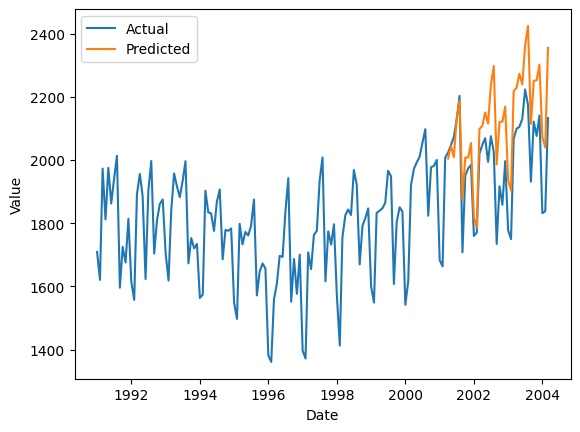

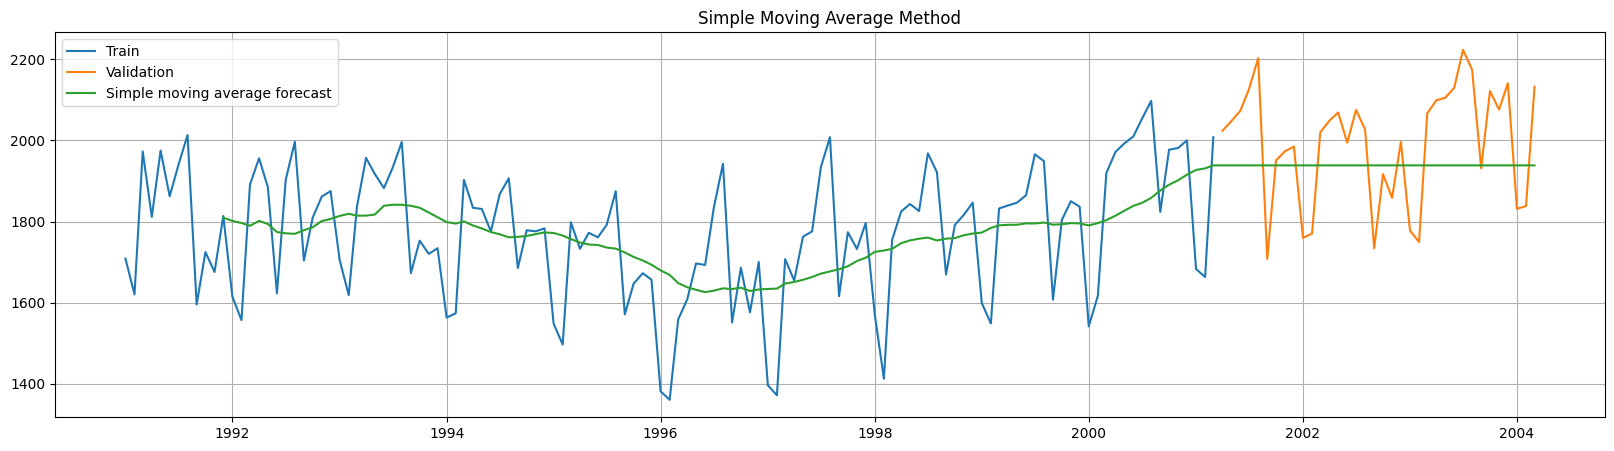

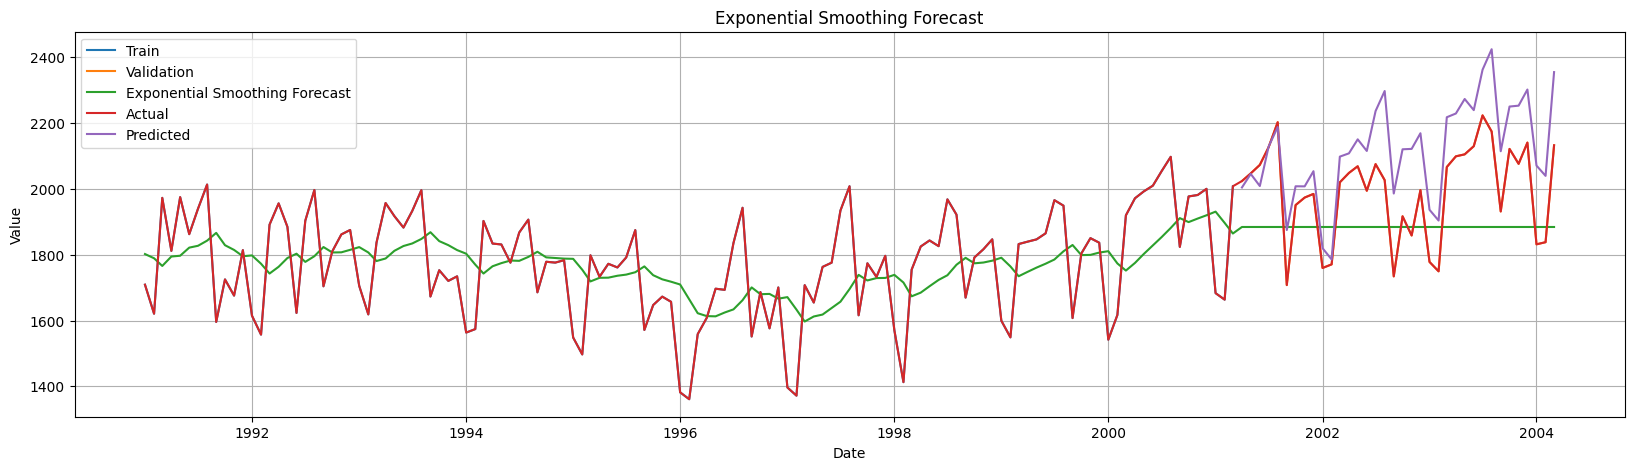

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt

# Plot the actual time series data
plt.plot(rider_ts.index, rider_ts, label='Actual')

# Plot the predicted time series data
plt.plot(predict_lm_trendseason.index, predict_lm_trendseason, label='Predicted')

# Add axis labels and a legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

In [11]:

# smoothing method 
ma = train_ts.rolling(12).mean() # create a rolling window of a time series
print(ma)

last_ma = ma[-1]

train_ts

ma

last_ma

predict_ma = pd.Series(last_ma,index=valid_ts.index)
combine_ma = pd.concat([ma, predict_ma])

print(ma)

Date
1991-01-01            NaN
1991-02-01            NaN
1991-03-01            NaN
1991-04-01            NaN
1991-05-01            NaN
                 ...     
2000-11-01    1901.808000
2000-12-01    1915.451167
2001-01-01    1927.241833
2001-02-01    1931.114833
2001-03-01    1938.480667
Name: Ridership, Length: 123, dtype: float64
Date
1991-01-01            NaN
1991-02-01            NaN
1991-03-01            NaN
1991-04-01            NaN
1991-05-01            NaN
                 ...     
2000-11-01    1901.808000
2000-12-01    1915.451167
2001-01-01    1927.241833
2001-02-01    1931.114833
2001-03-01    1938.480667
Name: Ridership, Length: 123, dtype: float64


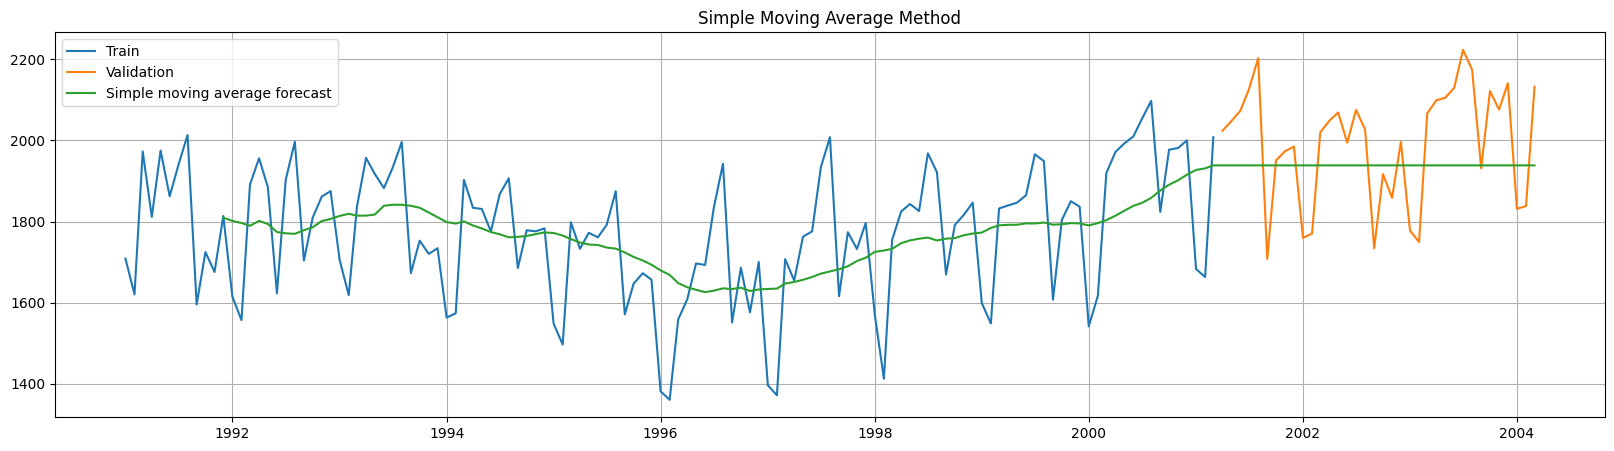


Regression statistics

                      Mean Error (ME) : 54.7296
       Root Mean Squared Error (RMSE) : 152.1767
            Mean Absolute Error (MAE) : 135.1550
          Mean Percentage Error (MPE) : 2.2278
Mean Absolute Percentage Error (MAPE) : 6.7771


In [16]:

# visualization of moving average 

%matplotlib inline
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_ts, label='Train')
plt.plot(valid_ts, label='Validation')
plt.plot(combine_ma, label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

regressionSummary(valid_ts,predict_ma)


In [13]:
from statsmodels.tsa.api import SimpleExpSmoothing
SES = SimpleExpSmoothing(train_ts,
                         initialization_method='estimated').fit() # estimated method is used, which estimates the initial smoothing level based on the data; which finds the value of alpha that minimizes the sum of squared errors between the predicted and actual values
predict_SES = SES.forecast(len(valid_ts))

SES.model.params

regressionSummary(valid_ts, predict_SES)

combine_SES = pd.concat([SES.fittedvalues, predict_SES])



Regression statistics

                      Mean Error (ME) : 109.0024
       Root Mean Squared Error (RMSE) : 179.0082
            Mean Absolute Error (MAE) : 160.6923
          Mean Percentage Error (MPE) : 4.9651
Mean Absolute Percentage Error (MAPE) : 7.9063


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


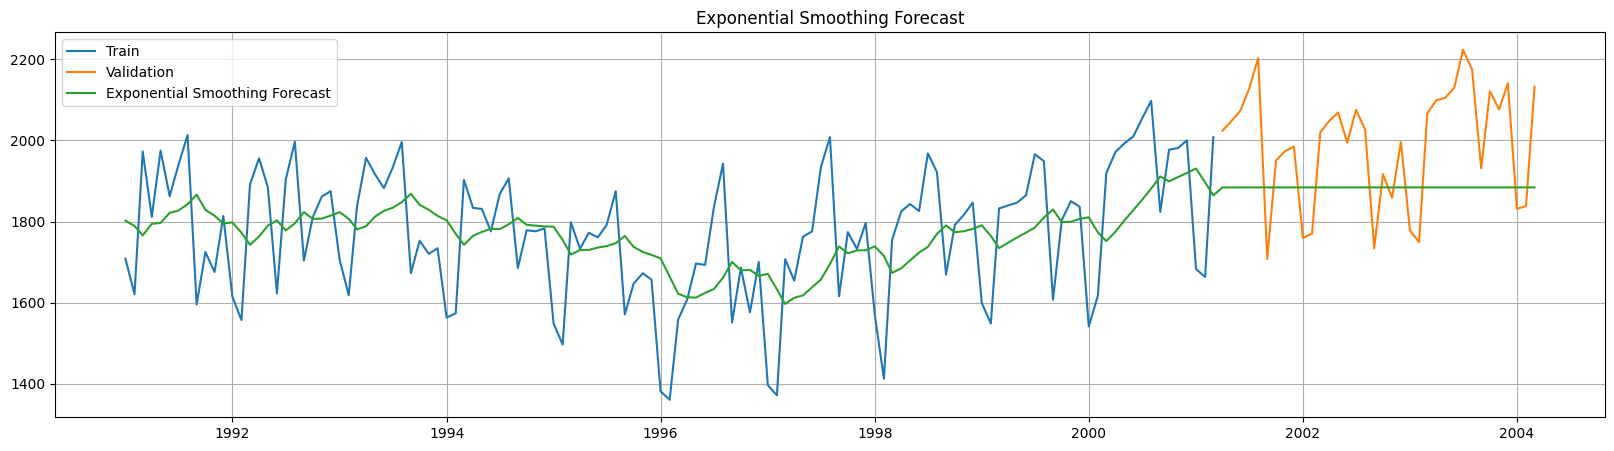

In [17]:

# visualization of exponential smoothing
%matplotlib inline
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_ts, label='Train')
plt.plot(valid_ts, label='Validation')
plt.plot(combine_SES, label='Exponential Smoothing Forecast')
plt.legend(loc='best')
plt.title('Exponential Smoothing Forecast')
plt.show()